In [1]:
import numpy as np
import matplotlib.pylab as plt
from pycbc import coordinates 



In [2]:
sAx, sAy, sAz = coordinates.spherical_to_cartesian(rho=0.7 , phi=2.5, theta=1.07)
sBx, sBy, sBz = coordinates.spherical_to_cartesian(rho=0.7 , phi=1.01, theta=2.25)

print(sAx, sAy, sAz, '\n', sBx, sBy, sBz)


-0.4919345084879483 0.3674860466216384 0.3360869603199738 
 0.2896786002452025 0.46122801239790406 -0.43972153590591734


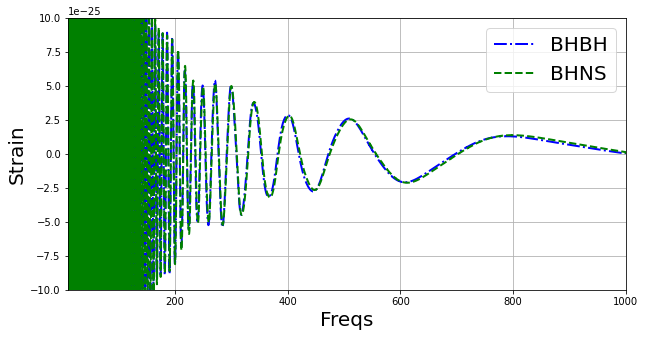

In [3]:
############# Gen IMRPhenomXPHM waveform
import lal
import lalsimulation as ls





#  min and max freq of the waveform
f_min =10
f_max=1000



#Inverse of sampling frequency
deltaF = 1/2048

# mass1>mass2
# Mass ratio >=1, 
mass1 = 3
mass2 = 2.6


inclination = 1.49



# d_L = 200 Mpc
distance = 200 * 10**6*lal.PC_SI
phiRef = 2.0
longAscNodes = 0.
eccentricity = 0.
meanPerAno = 0.
f_ref = 20.


q_val=mass1/mass2 # q_val >= 1
mTot = mass1+mass2
mA=q_val/(1. + q_val)*mTot*lal.MSUN_SI # greater mass
mB=mTot/(1. +q_val)*lal.MSUN_SI  # samller mass




# kapp1 and kappa2 are the coefficients quadrupole moments for object 1 and 2, 
kappa1 = 1
kappa2 = 1

lal_params = lal.CreateDict()
ls.SimInspiralWaveformParamsInsertKappa1(lal_params, kappa1 )
ls.SimInspiralWaveformParamsInsertKappa2(lal_params, kappa2 )
ls.SimInspiralWaveformParamsInsertIncludePI(lal_params, 1)
ls.SimInspiralWaveformParamsInsertIncludeAI(lal_params, 0)
ls.SimInspiralWaveformParamsInsertIncludeHA(lal_params, 0)

ma = ls.SimInspiralCreateModeArray()
ls.SimInspiralModeArrayActivateMode(ma, 2, 2) #l=m=2
ls.SimInspiralModeArrayActivateMode(ma, 3, 3)
ls.SimInspiralWaveformParamsInsertModeArray(lal_params,ma)
hpLAL, hcLAL = ls.SimInspiralChooseFDWaveform(mA, mB, sAx, sAy, sAz, sBx, sBy, sBz,
        distance, inclination, phiRef, longAscNodes, eccentricity,meanPerAno,
        deltaF, f_min, f_max, f_ref, lal_params, ls.IMRPhenomXPHM)





kappa1 = 1
kappa2 = 2



lal_params = lal.CreateDict()
ls.SimInspiralWaveformParamsInsertKappa1(lal_params, kappa1 )
ls.SimInspiralWaveformParamsInsertKappa2(lal_params, kappa2 )
ls.SimInspiralWaveformParamsInsertIncludePI(lal_params, 1)
ls.SimInspiralWaveformParamsInsertIncludeAI(lal_params, 0)
ls.SimInspiralWaveformParamsInsertIncludeHA(lal_params, 0)

ma = ls.SimInspiralCreateModeArray()
ls.SimInspiralModeArrayActivateMode(ma, 2, 2) #l=m=2
ls.SimInspiralModeArrayActivateMode(ma, 3, 3)
ls.SimInspiralWaveformParamsInsertModeArray(lal_params,ma)
hpLAL_1, hcLAL_1 = ls.SimInspiralChooseFDWaveform(mA, mB, sAx, sAy, sAz, sBx, sBy, sBz,
            distance, inclination, phiRef, longAscNodes, eccentricity,meanPerAno,
            deltaF, f_min, f_max, f_ref, lal_params, ls.IMRPhenomXPHM)





fLAL = np.arange(hpLAL.data.length) * hpLAL.deltaF
fLAL_1 = np.arange(hpLAL_1.data.length) * hpLAL_1.deltaF



ft=20
plt.figure(figsize=(10,5))
plt.plot(fLAL, hpLAL.data.data.real,  color='b', ls='-.', linewidth=2, label='BHBH')
plt.plot(fLAL_1, hpLAL_1.data.data.real,  color='g', ls='--', linewidth=2, label='BHNS')

plt.xlabel('Freqs', fontsize=ft)
plt.ylabel('Strain', fontsize=ft)
plt.legend(fontsize=ft)
plt.grid()
plt.xlim(f_min, f_max)
plt.ylim(-1e-24,1e-24)
plt.show()
# plt.savefig('BHBH-BHNS.jpg', dpi=300)


In [4]:
import pycbc.noise
import pycbc.psd
from pycbc.types import FrequencySeries

hp = FrequencySeries(hpLAL.data.data[:], delta_f=hpLAL.deltaF,epoch=hpLAL.epoch)
hp1 = FrequencySeries(hpLAL_1.data.data[:], delta_f=hpLAL_1.deltaF,epoch=hpLAL_1.epoch)




delta_f = hp.delta_f
flen = int(2048/ delta_f) + 1
psdap = pycbc.psd.aLIGOAPlusDesignSensitivityT1800042(flen, delta_f, f_min)


mm1 = 1- hp.match(hp1, psd=psdap, low_frequency_cutoff=f_min, high_frequency_cutoff=f_max)[0]
snr = pycbc.filter.matched_filter(hp, hp1, psd=psdap, low_frequency_cutoff=f_min)
snr1 = abs(snr).max()


# case C3 in table II in paper arXiv:2308.09032
# the mismatch here is a median value of mismatch for the PI effect alone as shown in Fig. 1
# the SNR here is slightly different from the value in Table. II, since we don't consider the detector responce here.
print('Mismatch: {:.2e}'.format(mm1), '\tSNR: {:.2f}'.format(snr1))



Mismatch: 5.06e-03 	SNR: 25.77
